Сборный проект
Самое время вспомнить знания, полученные в курсе, и решить ещё один аналитический кейс.
Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
 типа markdown. Примените форматирование и заголовки.

Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Загрузка данных:

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy import stats as st
from scipy.stats import ttest_ind


pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 80    
pd.set_option('display.float_format', '{:,.2f}'.format)
sns.set(rc={'figure.figsize':(15,10)})

In [2]:
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,"2,016.00",Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,"2,006.00",Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,"2,016.00",Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,"2,003.00",Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:** загрузили данные, информация о датасете говорит, что в данных есть проблемы. 

## Предобработка данных

In [4]:
df.columns = df.columns.str.lower()
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E


### Поиск дубликатов

Поиск явных дубликатов

In [5]:
df.duplicated().sum()

0

Поищем неявные дубликаты, опираяся на название игры и платформу выхода. 

In [6]:
print(df[df.duplicated(['name', 'platform'])].count())

name               4
platform           5
year_of_release    4
genre              4
na_sales           5
eu_sales           5
jp_sales           5
other_sales        5
critic_score       4
user_score         4
rating             4
dtype: int64


In [7]:
df = df.drop_duplicates(['name', 'platform'])

In [8]:
print(df[df.duplicated(['name', 'platform'])].count())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


In [9]:
len(df)

16710

**Промежуточный вывод:** явные дубликаты не обнаружены, удалены неявные дубликаты. 

### Обработка пропусков

In [10]:
df.isna().sum()

name                  1
platform              0
year_of_release     268
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

Посмотрим на процентное соотношения пропусков ко всему датасету: 

In [11]:
df.isna().sum()/len(df)

name              0.00
platform          0.00
year_of_release   0.02
genre             0.00
na_sales          0.00
eu_sales          0.00
jp_sales          0.00
other_sales       0.00
critic_score      0.51
user_score        0.40
rating            0.40
dtype: float64

In [12]:
len(df)/16715

0.9997008674842955

Исходя из полученных соотношений можем удалить данные с пропусками в годе выхода и наименовании, тк процент выборки низок, и это не скажется на полученных результатах. Отметим, что данные пропуски нельзя заменить в ручную. Сохранили 98.3% изначальной выборки. 

In [13]:
df = df.dropna(subset=['year_of_release'])
df = df.dropna(subset=['name'])

In [14]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

**Пропуски в оценках критиков и пользователей:**

In [15]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.5       2
2.3       2
0.2       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Заметим, что помимо пропусков в данных есть значение tbd, что также обозначает пропуск. Всего среди пользовательских оценок есть одна оценка 0 - такое маловероятно, чтобы оценка была 0, это - очевидный аутлайер. Прировняем все пропуски, а также значения tbd, в данном параметре к 0. 

In [17]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = 0
df['user_score'] = df['user_score'].fillna(0)

In [18]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [19]:
df['critic_score'].value_counts()

70.00    252
71.00    248
75.00    240
80.00    235
73.00    234
        ... 
29.00      3
20.00      3
13.00      1
17.00      1
21.00      1
Name: critic_score, Length: 81, dtype: int64

Аналогично прировняем пропуски в показателе оценки критиков к нулю. 

In [20]:
df['critic_score'] = df['critic_score'].fillna('0')

**Пропуски в оценках рейтинговой комиссии:**

In [21]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [22]:
df['rating'].value_counts()

E       3920
T       2903
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Заменим пропуски на "неизвестно".

In [23]:
df['rating'] = df['rating'].fillna('неизвестно')

In [24]:
df['rating'].unique()

array(['E', 'неизвестно', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [25]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

**Промежуточный вывод:** удалены пропуски, не влияющие сильно на выборку. В параметрах, где удалить пропуски невозможно, значения заменены на заглушки. 

### Изменение типо данных

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16441 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  float64
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     16441 non-null  object 
 9   user_score       16441 non-null  object 
 10  rating           16441 non-null  object 
dtypes: float64(5), object(6)
memory usage: 1.5+ MB


In [27]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['critic_score'] = df['critic_score'].astype('int')
df['user_score'] = df['user_score'].astype('float')

In [28]:
df = df.reset_index(drop=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16441 entries, 0 to 16440
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  int64  
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     16441 non-null  int64  
 9   user_score       16441 non-null  float64
 10  rating           16441 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


**Промежуточный вывод:** изменены типы данных, где необходимо, обновлены индексы датасета. 

###  Cуммарные продажи во всех регионах

In [30]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [31]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.00,неизвестно,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.00,неизвестно,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16436,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.00,неизвестно,0.01
16437,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.00,неизвестно,0.01
16438,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.00,неизвестно,0.01
16439,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0.00,неизвестно,0.01


### Вывод:

- Явные дубликаты не обнаружены, удалены неявные дубликаты исходя из сопоставления названия игры и платформы выхода
- Удалены пропуски, не влияющие сильно на выборку, мешающие определить название и год выхода. В параметрах, где удалить пропуски невозможно, значения заменены на заглушки
- Изменены типы данных, где необходимо, обновлены индексы датасета
- Сохранено 98.3% изначального датасета
- Добавлен столбец с общими продажами

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы

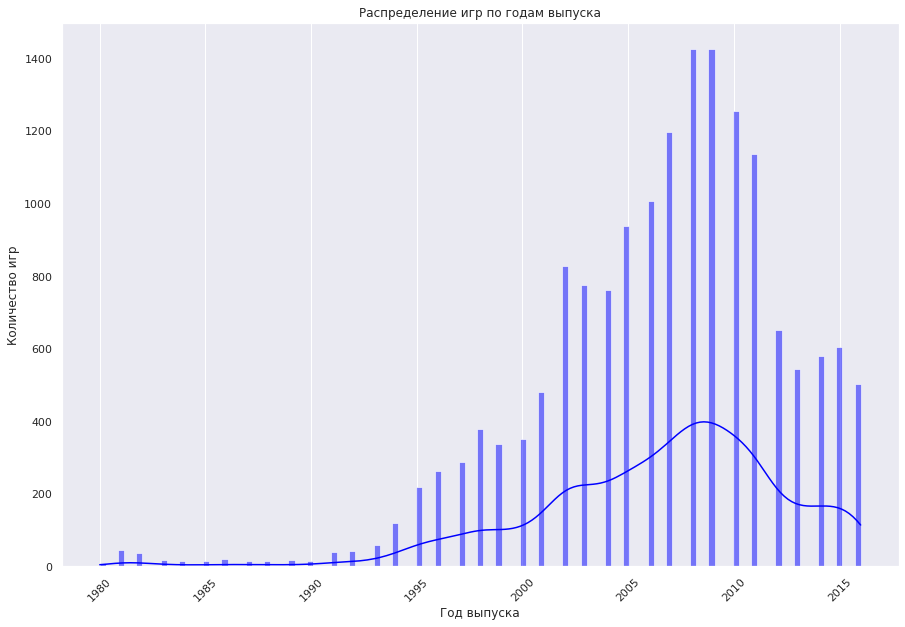

In [32]:
plt.figure(figsize=(15, 10))

sns.histplot(
    data=df,
    x='year_of_release',
    kde=True,
    bins=125,
    color='blue'
)

plt.title('Распределение игр по годам выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.grid(axis='y', alpha=1)
plt.xticks(rotation=45)

plt.show()

**Промежуточный вывод:** График показывает, что после 1994 года количество выпускаемых игр начало быстро расти. Также наблюдаем резкий рост после 2001 года и спад после 2011 года.

### Продажи по платформам

In [33]:
df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)[:10]

,total_sales
platform,
PS2,"1,233.56"
X360,959.99
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


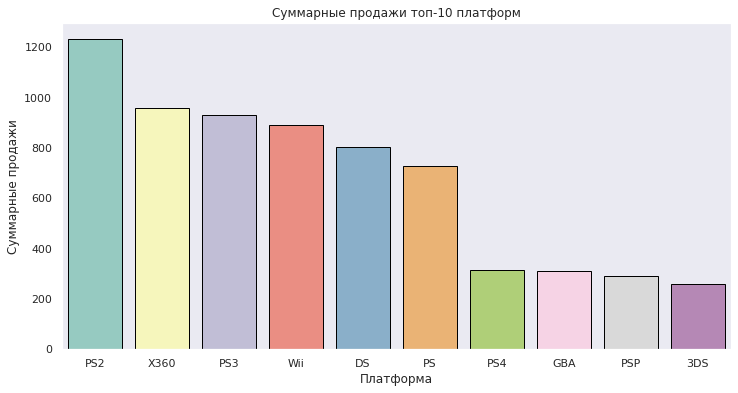

In [34]:
top_platforms = df.groupby('platform')['total_sales'].sum().nlargest(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=top_platforms.index, 
            y=top_platforms.values,
            palette='Set3',
            edgecolor='black')

plt.title('Суммарные продажи топ-10 платформ')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

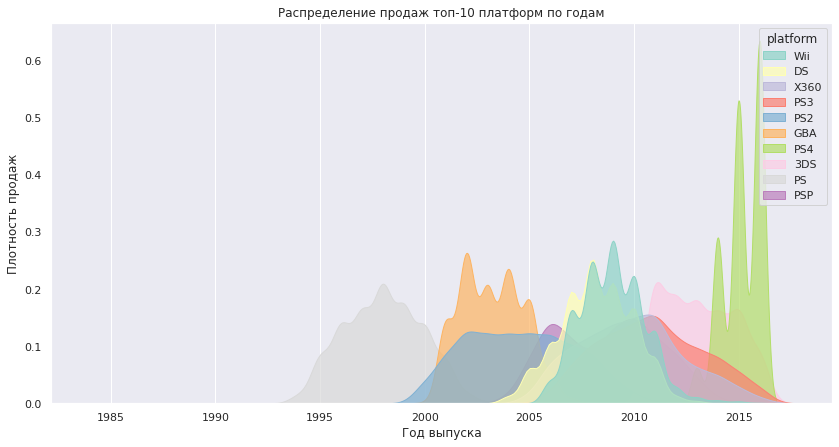

In [35]:
top_platforms = df.groupby('platform')['total_sales'].sum().nlargest(10).index
filtered_df = df[df['platform'].isin(top_platforms)]

plt.figure(figsize=(14, 7))
ax = sns.kdeplot(data=filtered_df, 
                 x='year_of_release', 
                 hue='platform', 
                 fill=True,
                 alpha=0.7,
                 common_norm=False,
                 palette='Set3',
                 legend=True)  
plt.title('Распределение продаж топ-10 платформ по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Плотность продаж')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


**Промежуточный вывод:** Самые популярные платформы по продажам: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'. График распределения продаж по годам показывает, что в среднем платформа живёт 10 лет. Пиковые продажи приходятся на середину периода популярности - 5 лет, затем наблюдается спад продаж. 

Основываясь на полученных результатах для дальнейшего исследования выберем период с 2006 года, чтобы посмотреть какие платформы на данный момент в конце жизненного цикла, а какие только набирают популярность на конец рассматриваемого периода. 

### Исследование  актуального периода (2013-1016)

In [36]:
df_sorted  = df[df['year_of_release'] >= 2013].reset_index(drop=True)
df_sorted.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.20,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.10,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.00,неизвестно,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,0.00,неизвестно,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.30,M,12.62


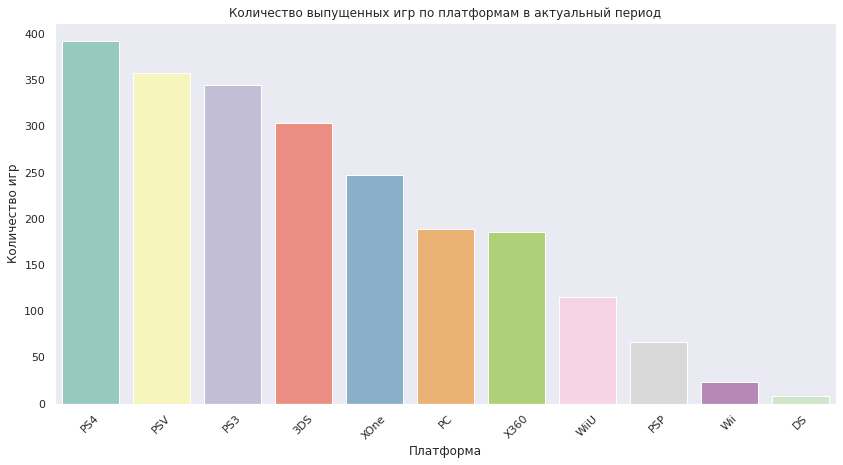

In [37]:
platform_counts = df_sorted.groupby('platform')['name'].count().sort_values(ascending=False)

top_platforms = platform_counts.nlargest(10).index
filtered_df = df_sorted[df_sorted['platform'].isin(top_platforms)]

plt.figure(figsize=(14, 7))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='Set3')
plt.title('Количество выпущенных игр по платформам в актуальный период')
plt.xlabel('Платформа')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()

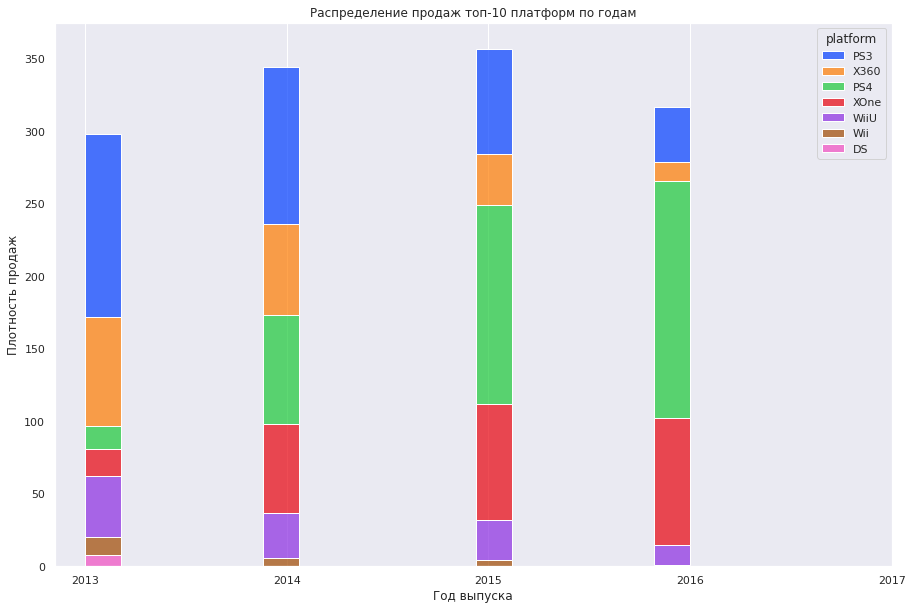

In [38]:
top_platforms = df_sorted.groupby('platform')['total_sales'].median().nlargest(7).index
filtered_df = df_sorted[df_sorted['platform'].isin(top_platforms)]

plt.figure(figsize=(15, 10))
ax = sns.histplot(data=filtered_df, 
                 x='year_of_release',
                 hue='platform',
                 alpha=0.7,
                 palette = 'bright',
                 multiple='stack',
                 legend=True)  
plt.title('Распределение продаж топ-10 платформ по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Плотность продаж')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(np.arange(2013, 2018, step=1))
plt.show();

**Промежуточный вывод:** график показывает, что среди топ-10 платформ за рассматриваемый период только PS4 и XOne не находятся в конце своего жизненного цикла, и всё ещё скачкообразно повышают свою популярность. Можно выделить их, как наиболее перпективные платформы. 

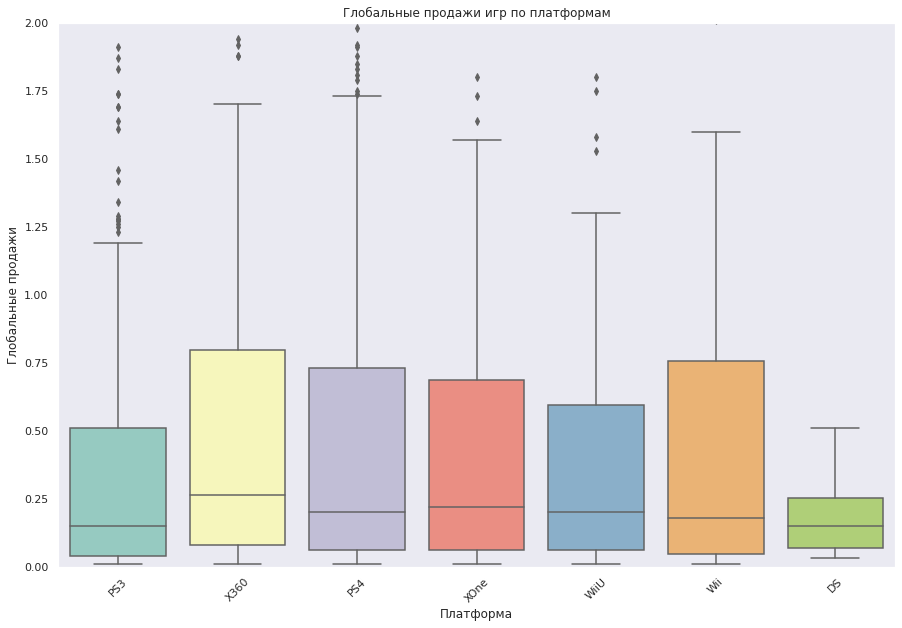

In [39]:
sns.boxplot(
    x='platform', 
    y='total_sales', 
    data=filtered_df,
    palette='Set3'
)
plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.ylim(0, 2)

plt.show()

**Промежуточный вывод:** график показывает, что консоли PS4 и XOne созраняют популярность при переходе с PS3 и X360 соответсвенно. Также можем увидеть высокую прибыльность консоли WiiU/Wii.

Период 2013-2016 характеризуется переходом на новое поколение консолей
Лидеры продаж соответствуют актуальным платформам того времени
Разброс продаж уменьшается у новых платформ и увеличивается у старых
Этот график подтверждает тенденцию перехода рынка на новое поколение консолей, где PS4 и XOne становятся основными платформами с наибольшим потенциалом продаж. При этом платформы предыдущего поколения все еще показывают значительные продажи, но с большим разбросом результатов.




### Влияние отзывов пользователей и критиков

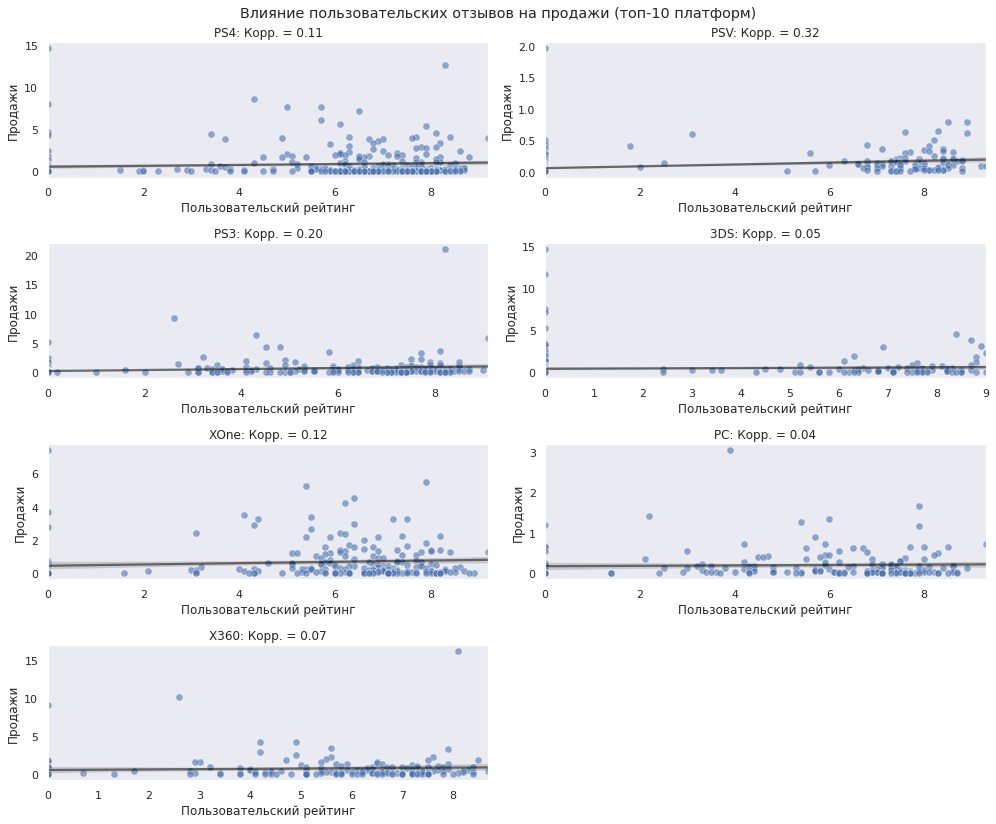

In [40]:
top_platforms = df_sorted['platform'].value_counts().index[:7]

filtered_df = df_sorted[df_sorted['platform'].isin(top_platforms)]

plt.figure(figsize=(14, 14))

for i, platform in enumerate(top_platforms):
    plt.subplot(5, 2, i + 1)
    
    platform_data = filtered_df[filtered_df['platform'] == platform]
    
    # Создаем диаграмму рассеяния
    sns.scatterplot(
        x='user_score', 
        y='total_sales', 
        data=platform_data,
        alpha=0.6,
        s=50
    )
    
    # Добавляем линию регрессии
    sns.regplot(
        x='user_score', 
        y='total_sales', 
        data=platform_data,
        scatter=False,
        color='black',
        line_kws={'alpha': 0.5}
    )
    
    # Вычисляем корреляцию
    correlation = platform_data['user_score'].corr(platform_data['total_sales'])
        
    plt.title(f'{platform}: Корр. = {correlation:.2f}')
    plt.xlabel('Пользовательский рейтинг')
    plt.ylabel('Продажи')
    plt.grid(linestyle='--', alpha=0.5)
  
plt.suptitle('Влияние пользовательских отзывов на продажи (топ-10 платформ)')
plt.tight_layout()
plt.show()


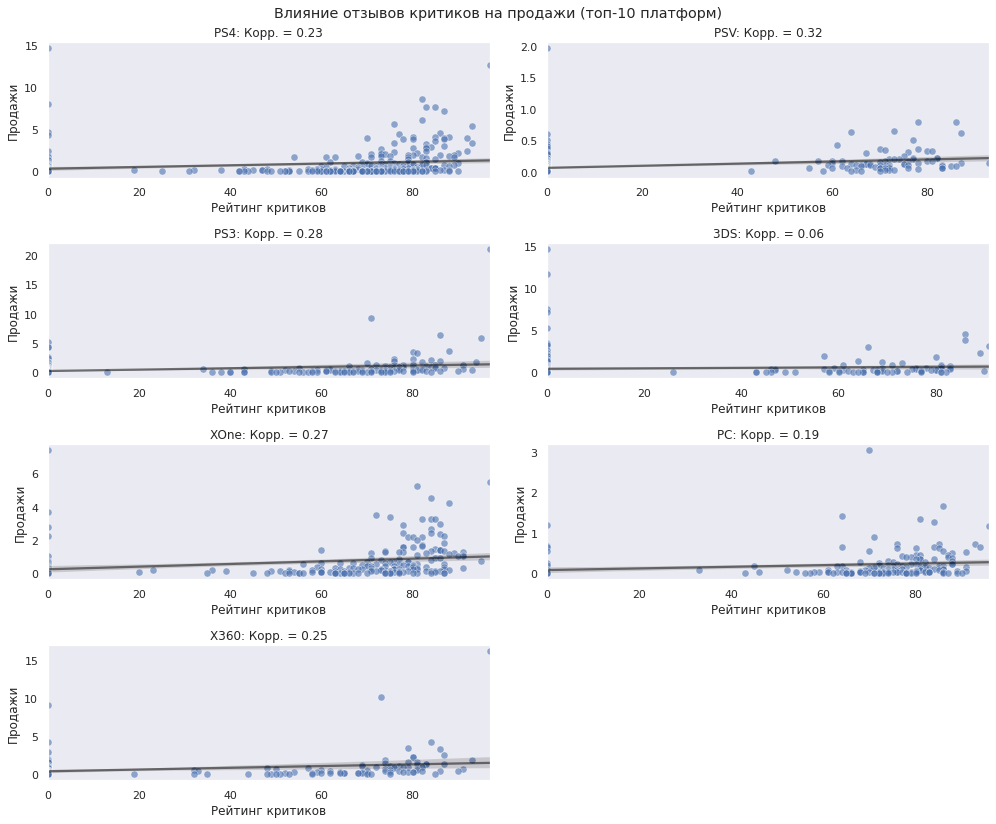

In [41]:
top_platforms = df_sorted['platform'].value_counts().index[:7]

filtered_df = df_sorted[df_sorted['platform'].isin(top_platforms)]

plt.figure(figsize=(14, 14))
for i, platform in enumerate(top_platforms):
    plt.subplot(5, 2, i + 1)

    platform_data = filtered_df[filtered_df['platform'] == platform]
    
    # Создаем диаграмму рассеяния
    sns.scatterplot(
        x='critic_score', 
        y='total_sales', 
        data=platform_data,
        alpha=0.6,
        s=50
    )
    
    # Добавляем линию регрессии
    sns.regplot(
        x='critic_score', 
        y='total_sales', 
        data=platform_data,
        scatter=False,
        color='black',
        line_kws={'alpha': 0.5}
    )
    
    # Вычисляем корреляцию
    correlation = platform_data['critic_score'].corr(platform_data['total_sales'])
    
    plt.title(f'{platform}: Корр. = {correlation:.2f}')
    plt.xlabel('Рейтинг критиков')
    plt.ylabel('Продажи')
    plt.grid(linestyle='--', alpha=0.5)
  
plt.suptitle('Влияние отзывов критиков на продажи (топ-10 платформ)')
plt.tight_layout()
plt.show()

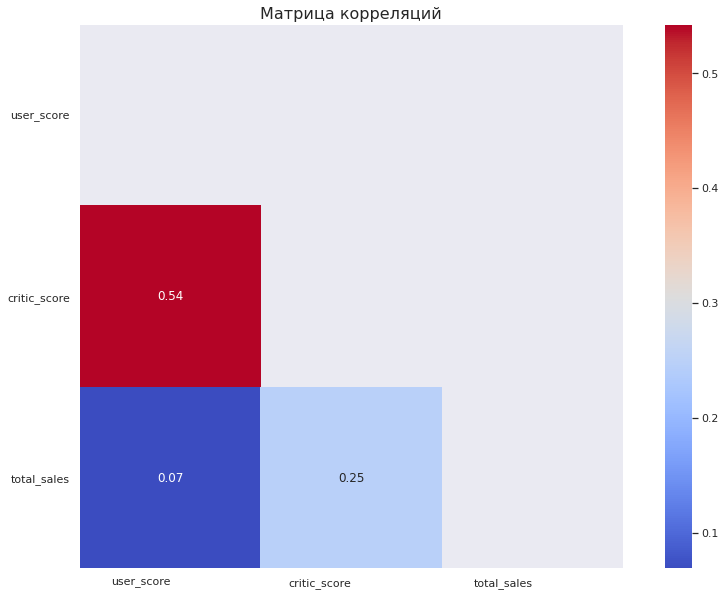

In [42]:

# Вычисляем корреляционную матрицу
matrix = platform_data[['user_score', 'critic_score', 'total_sales']].corr()
    

plt.figure(figsize=(15, 10))
# Матрица корреляций без диагонали
mask = np.triu(np.ones_like(matrix, dtype=bool))
# Визуализируем матрицу
sns.heatmap(
    matrix,
    annot=True,
    mask=mask,
    cmap='coolwarm',
    square=True,
    fmt='.2f'
)
    

plt.title('Матрица корреляций', fontsize=16)
plt.xticks(rotation=0, ha='right')
plt.yticks(rotation=0)
    
plt.show()
    


**Промежуточный вывод:** как показали графики по платформам и матрица корреляции, продажи слабо зависят от оценок пользователей или критиков. Однако оценки критиков, не смотря на низкое значение, почти в 4 раза сильнее влияют на продажи. Это также можно отметить по графикам корреляций для отдельных платформ.

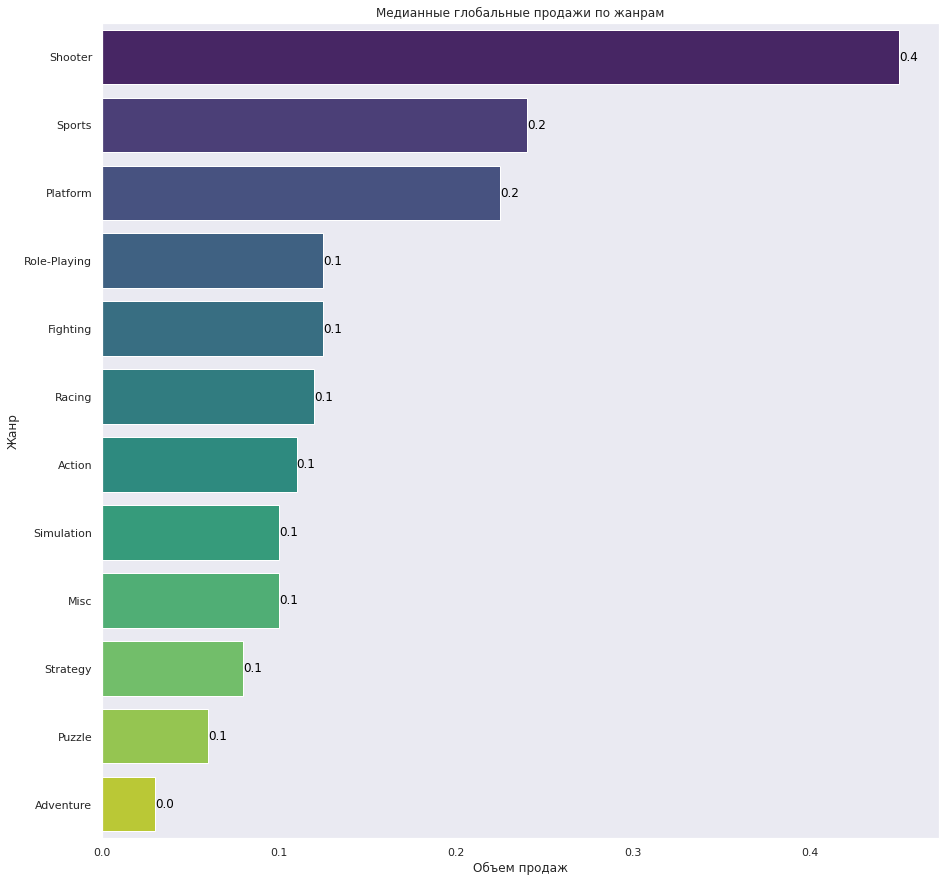

In [43]:
genre_sales = df_sorted.groupby('genre')['total_sales'].median().sort_values(ascending=False)


plt.figure(figsize=(15, 15))
sns.barplot(
    x=genre_sales.values, 
    y=genre_sales.index,
    palette='viridis'
)

plt.title('Медианные глобальные продажи по жанрам')
plt.xlabel('Объем продаж')
plt.ylabel('Жанр')
plt.grid(axis='x')

for i, v in enumerate(genre_sales.values):
    plt.text(v, i, f'{v:.1f}', color='black', va='center')

plt.show()

**Промежуточный вывод:** самые распространенные жанры - шутеры, с отрывом, и спортивные игры, наименее популярные - приключения и пазлы.

### Вывод:

- После 1994 года количество выпускаемых игр начало быстро расти. Также наблюдаем резкий рост после 2001 года и спад после 2011 года.

- Самые популярные платформы по продажам: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'. График распределения продаж по годам показывает, что в среднем платформа живёт 10 лет. Пиковые продажи приходятся на середину периода популярности - 5 лет, затем наблюдается спад продаж.

- Среди топ-10 платформ за рассматриваемый период только PS4 и XOne не находятся в конце своего жизненного цикла, и всё ещё скачкообразно повышают своб популярность.

- Продажи слабо зависят от оценок пользователей или критиков. Однако, при низких показателях корреляции оценки критиков в 3-4 раза более значимые. 

- Самые распространенные жанры - шутеры, с отрывом, и спортивные игры, наименее популярные - приключения и пазлы.

- Консоли PS4 и XOne созраняют популярность при переходе с PS3 и X360 соответсвенно. Если PS3 и X360 в конце своего жизненного цикла, и пользователи переходят на новые версии консолей.


Период 2013-2016 характеризуется переходом на новое поколение консолей
Лидеры продаж соответствуют актуальным платформам того времени
Разброс продаж уменьшается у новых платформ и увеличивается у старых
Этот график подтверждает тенденцию перехода рынка на новое поколение консолей, где PS4 и XOne становятся основными платформами с наибольшим потенциалом продаж. При этом платформы предыдущего поколения все еще показывают значительные продажи, но с большим разбросом результатов.



## Портрет пользователя каждого региона

### Распределение топ-5 платформ и жанров по регионам

In [44]:
df_na = df_sorted.groupby('platform')['na_sales'].sum().nlargest(5)
df_eu = df_sorted.groupby('platform')['eu_sales'].sum().nlargest(5)
df_jp = df_sorted.groupby('platform')['jp_sales'].sum().nlargest(5)

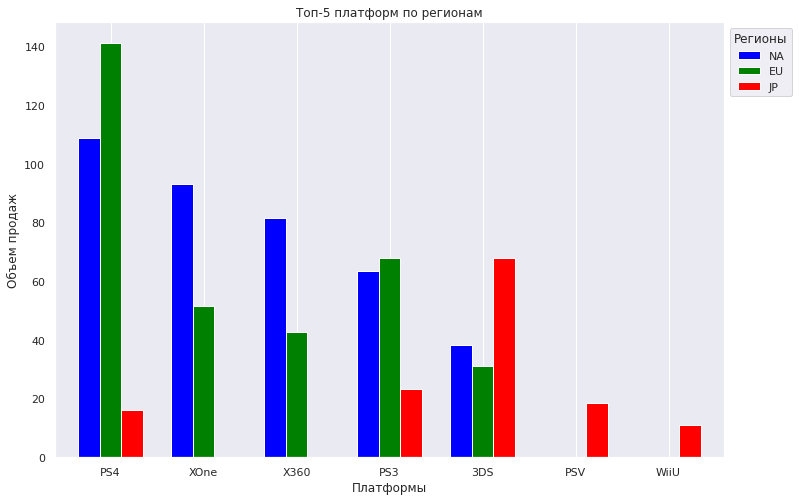

In [45]:
df_region = pd.concat([
    df_na.rename('NA'),
    df_eu.rename('EU'),
    df_jp.rename('JP')
], axis=1)

# Визуализация
ax = df_region.plot(
    kind='bar',
    color=['blue', 'green', 'red'],
    width=0.7,
    figsize=(12, 8)
)

plt.xticks(rotation=0)
plt.title('Топ-5 платформ по регионам')
plt.xlabel('Платформы')
plt.ylabel('Объем продаж')
plt.grid(axis='y', alpha=0.5)
plt.legend(title='Регионы', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

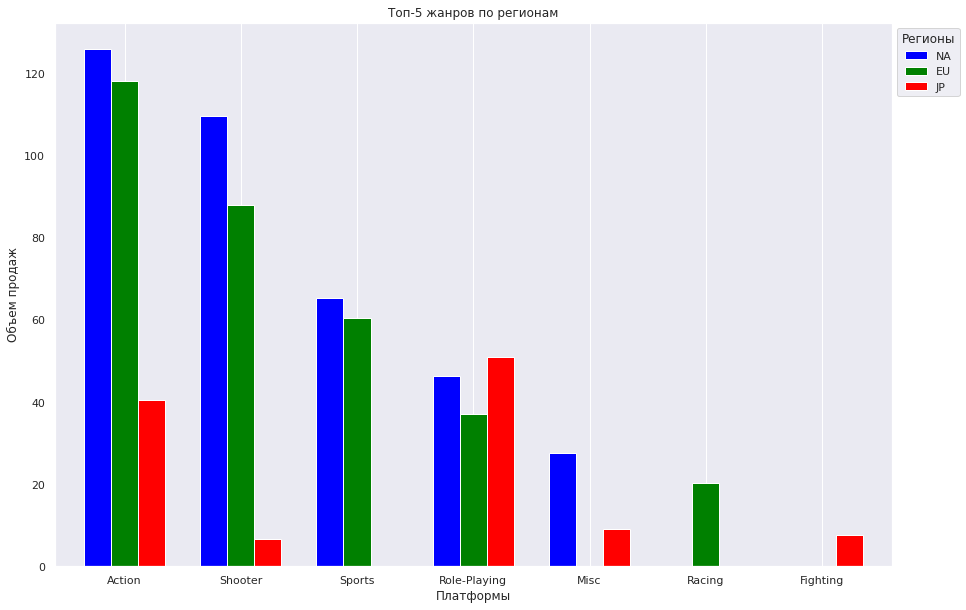

In [46]:
df_na = df_sorted.groupby('genre')['na_sales'].sum().nlargest(5)
df_eu = df_sorted.groupby('genre')['eu_sales'].sum().nlargest(5)
df_jp = df_sorted.groupby('genre')['jp_sales'].sum().nlargest(5)

df_region = pd.concat([
    df_na.rename('NA'),
    df_eu.rename('EU'),
    df_jp.rename('JP')
], axis=1)

# Визуализация
ax = df_region.plot(
    kind='bar',
    color=['blue', 'green', 'red'],
    width=0.7,
    figsize=(15, 10)
)

plt.xticks(rotation=0)
plt.title('Топ-5 жанров по регионам')
plt.xlabel('Платформы')
plt.ylabel('Объем продаж')
plt.grid(axis='y', alpha=0.5)
plt.legend(title='Регионы', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

**Промежуточный вывод:** 


Платформы (топ-5):

Северная Америка (NA):
- Лидируют консоли Microsoft и Sony (PS4, X360, PS3, XOne, WiiU)

Европа (EU):
- Схожая картина с NA, но с акцентом на Sony (PS4, PS3)
- Меньше представлены Xbox консоли

Япония (JP):
- Доминирование портативных консолей.
- Практически отсутствуют консоли Microsoft

Жанры (топ-5):

NA и EU:
- Преобладают Action, Sports и Shooter

JP:
- Преобладают Role-Playing игры
- Популярные жанры не совпадают с Европой и Америкой.

Общий вывод: рынок видеоигр демонстрирует явное разделение на западный (NA/EU) и восточный (JP) сегменты, причем различия проявляются как в предпочтениях по платформам, так и в жанровых предпочтениях. Японские игроки показывают наибольшую специфику в обоих аспектах. Вероятно, данная разница показывает отличия в менталитетах культур. Также можем заметить региональную принадлежность производителя консоли.


### Влияние рейтинга ESRB на продажи в отдельном регионе

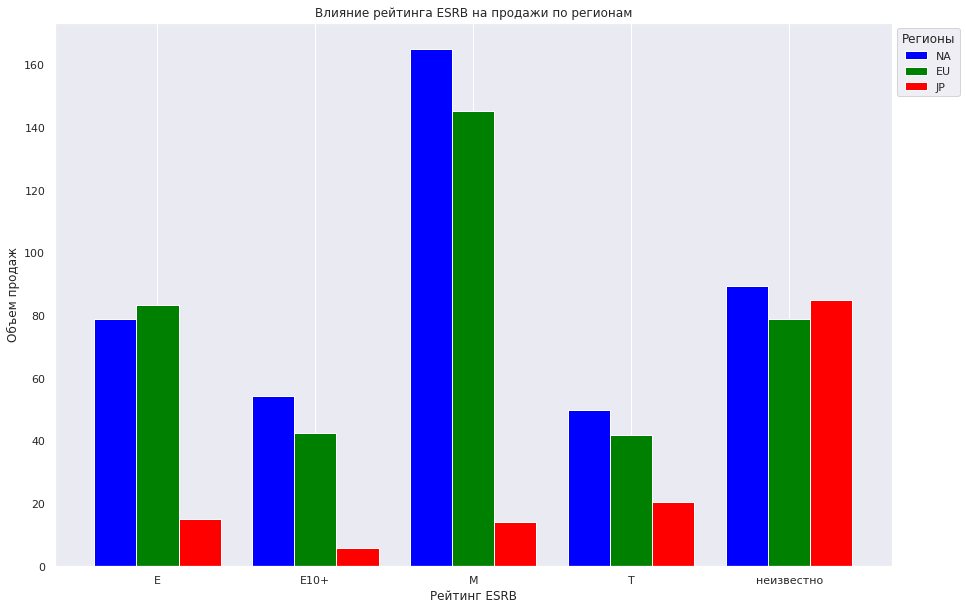

In [47]:
na_sales = df_sorted[df_sorted['na_sales'] > 0].groupby('rating')['na_sales'].sum()
eu_sales = df_sorted[df_sorted['eu_sales'] > 0].groupby('rating')['eu_sales'].sum()
jp_sales = df_sorted[df_sorted['jp_sales'] > 0].groupby('rating')['jp_sales'].sum()

esrb_df = pd.concat([
    na_sales.rename('NA'),
    eu_sales.rename('EU'),
    jp_sales.rename('JP')
], axis=1)

# Визуализация
ax = esrb_df.plot(
    kind='bar',
    color=['blue', 'green', 'red'],
    width=0.8
)
plt.xticks(rotation=0)
plt.title('Влияние рейтинга ESRB на продажи по регионам')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Объем продаж')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Регионы', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

**Промежуточный вывод:**

- Рейтинг ESRB наиболее существенно влияет на продажи в Северной Америке и Европе
- В Японии система ESRB практически не играет роли,вероятно, из-за использования собственной рейтинговой системы
- Игры с рейтингом М показывают лучшие продажи в NA и EU
- Игры, без указанного рейтинга показывают, что возрастной рейтинг не всегда указывает на величину продаж. 

### Вывод:

Платформы (топ-5):

Северная Америка (NA):
- Лидируют консоли Microsoft и Sony (PS4, X360, PS3, XOne, WiiU)

Европа (EU):
- Схожая картина с NA, но с акцентом на Sony (PS4, PS3)
- Меньше представлены Xbox консоли

Япония (JP):
- Доминирование портативных консолей.
- Практически отсутствуют консоли Microsoft

Жанры (топ-5):

NA и EU:
- Преобладают Action, Sports и Shooter

JP:
- Преобладают Role-Playing игры
- Популярные жанры не совпадают с Европой и Америкой.

Общий вывод: рынок видеоигр демонстрирует явное разделение на западный (NA/EU) и восточный (JP) сегменты, причем различия проявляются как в предпочтениях по платформам, так и в жанровых предпочтениях. Японские игроки показывают наибольшую специфику в обоих аспектах. Вероятно, данная разница показывает отличия в менталитетах культур. Также можем заметить региональную принадлежность производителя консоли.


**Влияние рейтинга ESRB:**

- Рейтинг ESRB наиболее существенно влияет на продажи в Северной Америке и Европе
- В Японии система ESRB практически не играет роли,вероятно, из-за использования собственной рейтинговой системы
- Игры с рейтингом М показывают лучшие продажи в NA и EU
- Игры, без указанного рейтинга показывают, что возрастной рейтинг не всегда указывает на величину продаж. 

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC

- Нулевая гипотеза H0: Средние рейтинги платформ равны
- Альтернативная гипотеза H1: Средние рейтинги платформ различаются

In [48]:
alpha = 0.05

In [49]:
xbox_one_ratings = df_sorted.query('platform == "XOne" and user_score > 0')['user_score']
pc_ratings = df_sorted.query('platform == "PC" and user_score > 0')['user_score']


result_xbox_pc = st.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=False, alternative='two-sided')

In [50]:
print(f"Гипотеза 1 (Сравнение Xbox One и PC):")
print(f"p-value: {result_xbox_pc.pvalue:.4f}")

if result_xbox_pc.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Гипотеза 1 (Сравнение Xbox One и PC):
p-value: 0.1476
Не получилось отвергнуть нулевую гипотезу


**Промежуточный вывод:** Принимаем нулевую гипотезу, при p-value = 0.05: Средние рейтинги платформ равны

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)

- Нулевая гипотеза H0: Средние рейтинги жанров равны
- Альтернативная гипотеза H1: Средние рейтинги жанров различаются

In [51]:
action_ratings = df_sorted.query('genre == "Action" and user_score > 0')['user_score']
sport_ratings = df_sorted.query('genre == "Sports" and user_score > 0')['user_score']


result_action_sport = st.ttest_ind(action_ratings, sport_ratings, equal_var=False, alternative='two-sided')

In [52]:
print(f"Гипотеза 2 (Сравнение жанров Action и Sports):")
print(f"p-value: {result_action_sport.pvalue:.4f}")

if result_action_sport.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Гипотеза 2 (Сравнение жанров Action и Sports):
p-value: 0.0000
Отвергаем нулевую гипотезу


**Промежуточный вывод:** отвергаем нулевую гипотезу гипотезу, при p-value = 0.05: Средние рейтинги жанров Action и Sports различаются.

### Вывод: 

- Принимаем нулевую гипотезу, при p-value = 0.05: Средние рейтинги платформ  Xbox One и PC равны.
- Отвергаем нулевую гипотезу гипотезу, при p-value = 0.05: Средние рейтинги жанров Action и Sports различаются.

Для проверки гипотез использован двухвыборочный t-тест Стьюдента для независимых выборок. Выбор обусловлен следующими причинами:

- Данные являются независимыми (оценки разных игр на разных платформах/в разных жанрах)
- Необходимо сравнить средние значения двух выборок


## Общие выводы:

Информация об исходном датасете говорит, что в данных есть проблемы.

**Предобработка данных:**

- Явные дубликаты не обнаружены, удалены неявные дубликаты исходя из сопоставления названия игры и платформы выхода
- Удалены пропуски, не влияющие сильно на выборку, мешающие определить название и год выхода. В параметрах, где удалить пропуски невозможно, значения заменены на заглушки
- Изменены типы данных, где необходимо, обновлены индексы датасета
- Сохранено 98.3% изначального датасета
- Добавлен столбец с общими продажами

**Исследовательский анализ данных:**

- После 1994 года количество выпускаемых игр начало быстро расти. Также наблюдаем резкий рост после 2001 года и спад после 2011 года.

- Самые популярные платформы по продажам: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'. График распределения продаж по годам показывает, что в среднем платформа живёт 10 лет. Пиковые продажи приходятся на середину периода популярности - 5 лет, затем наблюдается спад продаж.

- Среди топ-10 платформ за рассматриваемый период только PS4 и XOne не находятся в конце своего жизненного цикла, и всё ещё скачкообразно повышают своб популярность.

- Продажи слабо зависят от оценок пользователей или критиков. Однако, при низких показателях корреляции оценки критиков в 3-4 раза более значимые. 

- Самые распространенные жанры - шутеры, с отрывом, и спортивные игры, наименее популярные - приключения и пазлы.

- Консоли PS4 и XOne созраняют популярность при переходе с PS3 и X360 соответсвенно. Если PS3 и X360 в конце своего жизненного цикла, и пользователи переходят на новые версии консолей.


Период 2013-2016 характеризуется переходом на новое поколение консолей
Лидеры продаж соответствуют актуальным платформам того времени
Разброс продаж уменьшается у новых платформ и увеличивается у старых
Этот график подтверждает тенденцию перехода рынка на новое поколение консолей, где PS4 и XOne становятся основными платформами с наибольшим потенциалом продаж. При этом платформы предыдущего поколения все еще показывают значительные продажи, но с большим разбросом результатов.

**Портрет пользователя каждого региона:**

Платформы (топ-5):

Северная Америка (NA):
- Лидируют консоли Microsoft и Sony (PS4, X360, PS3, XOne, WiiU)

Европа (EU):
- Схожая картина с NA, но с акцентом на Sony (PS4, PS3)
- Меньше представлены Xbox консоли

Япония (JP):
- Доминирование портативных консолей.
- Практически отсутствуют консоли Microsoft

Жанры (топ-5):

NA и EU:
- Преобладают Action, Sports и Shooter

JP:
- Преобладают Role-Playing игры
- Популярные жанры не совпадают с Европой и Америкой.

Общий вывод: рынок видеоигр демонстрирует явное разделение на западный (NA/EU) и восточный (JP) сегменты, причем различия проявляются как в предпочтениях по платформам, так и в жанровых предпочтениях. Японские игроки показывают наибольшую специфику в обоих аспектах. Вероятно, данная разница показывает отличия в менталитетах культур. Также можем заметить региональную принадлежность производителя консоли.


**Влияние рейтинга ESRB:**

- Рейтинг ESRB наиболее существенно влияет на продажи в Северной Америке и Европе
- В Японии система ESRB практически не играет роли,вероятно, из-за использования собственной рейтинговой системы
- Игры с рейтингом М показывают лучшие продажи в NA и EU
- Игры, без указанного рейтинга показывают, что возрастной рейтинг не всегда указывает на величину продаж. 

**Проверка гипотез:**

- Отвергаем нулевую гипотезу, при p-value = 0.05, принимаем альтернативную: Средние рейтинги платформ  Xbox One и PC различаются.
- Отвергаем нулевую гипотезу гипотезу, при p-value = 0.05, принимаем альтернативную: Средние рейтинги жанров Action и Sports различаются.

Для проверки гипотез использован двухвыборочный t-тест Стьюдента для независимых выборок. Выбор обусловлен следующими причинами:

- Данные являются независимыми (оценки разных игр на разных платформах/в разных жанрах)
- Необходимо сравнить средние значения двух выборок

**Основные рекомендации:**

- Учитывать четкое разделение рынка на западный (NA/EU) и восточный (Япония) сегменты, адаптируя под них отдельные аспекты, так как японские игроки демонстрируют наибольшую специфику в выборе платформ и жанров.
- Фокусироваться на популярных платформах PS4 и XOne, учитывая 10-летний жизненный цикл консолей и пик продаж на 5-м году популярности платформы.
- Разрабатывать игры с учетом региональных предпочтений: для NA/EU акцент на жанры Action, Sports и Shooter, для Японии - на Role-Playing, при этом использовать соответствующую рейтинговую систему (ESRB для NA/EU, локальную для Японии).
- Обратить внимание на жанр Action как самый популярный и стратегии/пазлы как наименее популярные, при этом не фокусироваться на высоких оценках, так как они слабо влияют на продажи.